In [2]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def coordinate(number, a, b):
    return np.array([number % a, number // b])


def distance(i, j, a, b):
    dx, dy = coordinate(i, a, b) - coordinate(j, a, b)
    if np.abs(dx) > a/2:
        dx = a - np.abs(dx)
    if np.abs(dy) > b/2:
        dy = b - np.abs(dy)
    return np.linalg.norm([dx,dy])
    #return coordinate(i, a, b) - coordinate(j, a, b))

def dd(n, x, y, delta):
    data = {}
    for i in range(n):
        for j in range(n):
            rij = distance(i, j, x, y)
            if rij not in data:
                data[rij] = [delta[i] * delta[j]]
            else:
                data[rij].append(delta[i] * delta[j])
    return data

In [34]:
U = 0.8
Vs = [0.05, -3.3]
Ts = np.arange(10, 301, 10)
gap = []
for V in Vs:
    deltas = []
    for T in Ts:  
        try:
            with h5py.File(f"NNN/data_V{V:.2f}/U{U}_point0.85_T{T}") as f:
                e = f['evals'][:]
                v = f['evecs'][:]
                delta = f['delta'][:]
                n = f['avg'][:]
            deltas.append(delta)
            indx = np.where(e >= 0)[0]
        except:
            deltas.append(np.array([0]))
    d = np.array([np.mean(np.abs(delta)) for delta in deltas]) 
    gap.append(d)
    
plt.figure(figsize=(6, 4))
for i,V in enumerate(Vs):
    ind = gap[i] > 3e-5
    if i == 0:
        delta0 = np.max(gap[0][ind])
        Tc = Ts[ind][np.where(gap[0][ind] < 1e-3)[0][0]]
    #plt.plot(Ts[ind] / Tc , gap[i][ind] / delta0 , '--o', label = f'V = {V}')
    plt.plot(Ts[ind]  , gap[i][ind]  , '--o', label = f'V = {V}')
plt.grid()
plt.xlabel('T / Tc')
plt.ylabel('<$\Delta_i>$ / $\Delta_0$')
plt.legend()

<ipython-input-34-a25493d2943a>:9: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  with h5py.File(f"NNN/data_V{V:.2f}/U{U}_point0.85_T{T}") as f:


ValueError: zero-size array to reduction operation maximum which has no identity

<Figure size 432x288 with 0 Axes>

In [32]:
Ts[gap[1] < 3e-5]

array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290, 300])

In [33]:
d

array([8.58316429e-07, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00])

<ipython-input-3-7319eb43c46a>:7: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  with h5py.File(f"data/data_V{V:.2f}/U{U}_point1_T{T}") as f:


Text(0, 0.5, '$max(\\Delta_i)$')

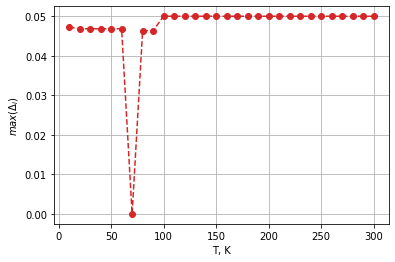

In [3]:
U = 0.75
V = 0.05
Ts = np.arange(10, 301, 10)
deltas = []
for T in Ts:
    try:
        with h5py.File(f"data/data_V{V:.2f}/U{U}_point1_T{T}") as f:
            e = f['evals'][:]
            v = f['evecs'][:]
            delta = f['delta'][:]
            n = f['avg'][:]
        deltas.append(delta)
        indx = np.where(e >= 0)[0]
    except:
        deltas.append(np.array([0.050]))
plt.figure(figsize=(6, 4))
d = np.array([np.max(np.abs(delta)) for delta in deltas]) 
ind = d > 1e-6

plt.grid()
plt.plot(Ts[ind], d[ind], '--o', color = 'tab:red')
plt.xlabel('T, K')
plt.ylabel('$max(\Delta_i)$')

In [4]:
def gauss_hist(x, n, sigma):
    f = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        f[i] = np.sum(np.exp( - (x[i]- n) ** 2 / 2 / sigma**2 ) / np.sqrt(2 * np.pi * sigma ** 2)) / n.shape[0] 
    return f

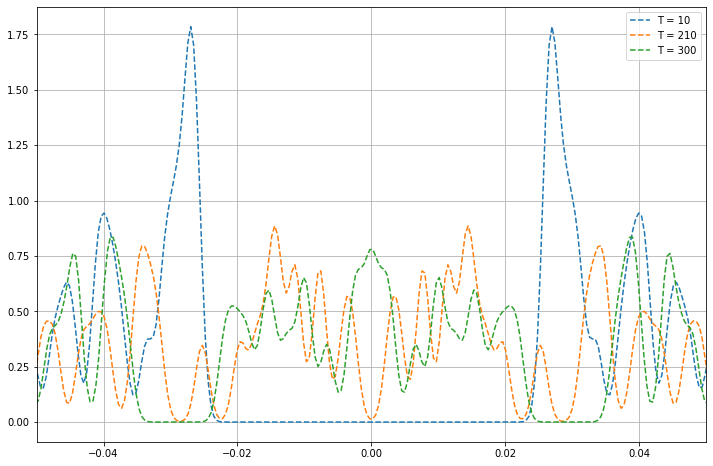

In [6]:
plt.figure(figsize=(12,8))
for T in Ts[[0, -10, -1]]:
    with h5py.File(f"data/data_V{V:.2f}/U{U}_point1_T{T}", 'r') as f:
        delta = f['delta'][:]
        n = f['avg'][:]
        e = f['evals'][:]
        v = f['evecs'][:]
        indx = np.where(e >= 0)
        
        x = np.linspace(np.min(e), np.max(e), 20000)
        plt.plot(x, gauss_hist(x, e, 0.001), '--', label= 'T = ' + str(T))
        #plt.figure(figsize=(12,8))
        #plt.scatter(range(e.shape[0]), sorted(e), s=10, label= 'U = ' + str(U))
        plt.grid()
        plt.legend()
        plt.xlim(-0.05, 0.05)

Text(0.5, 0, 'T, K')

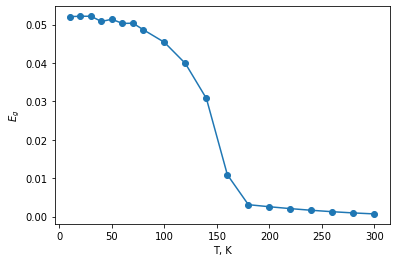

In [7]:
plt.figure(figsize=(6,4))
Eg = []
for T in Ts:
    with h5py.File(f"data/data_V{V:.2f}/U{U}_point1_T{T}", 'r') as f:
        delta = f['delta'][:]
        n = f['avg'][:]
        e = f['evals'][:]
        v = f['evecs'][:]
    indx = np.where(e >= 0)
        #plt.plot(x, gauss_hist(x,e, 0.2), label= 'U = ' + str(U))
    #plt.figure(figsize=(12,8))
    Eg.append(2 * sorted(e[indx])[0])
plt.plot(Ts[ind], np.array(Eg)[ind], '-o')
plt.ylabel('$E_g$')
plt.xlabel('T, K')

/home/titan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  after removing the cwd from sys.path.


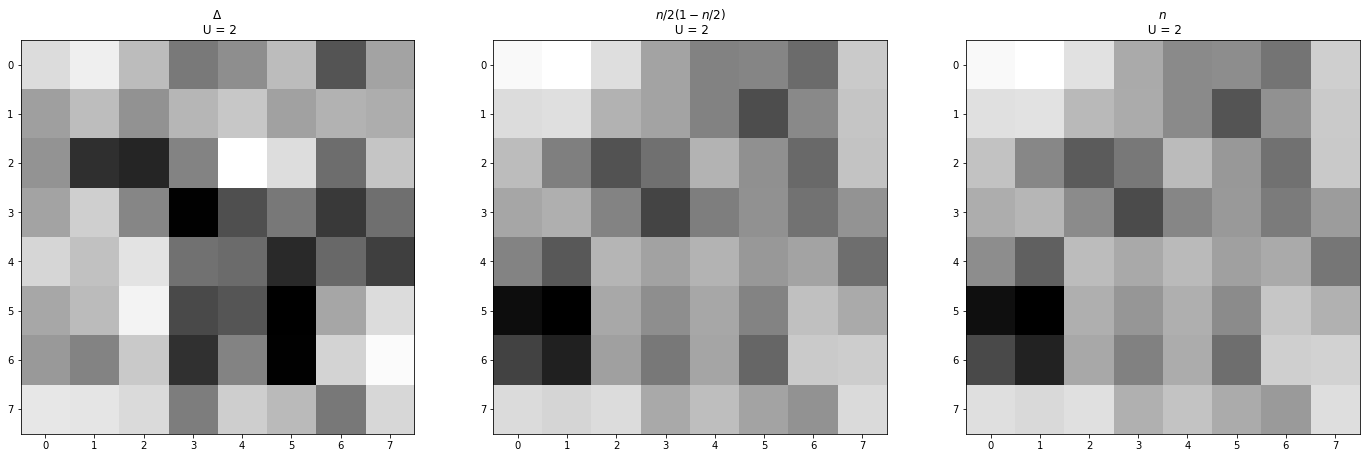

In [7]:
U = 2
V = 0.5
for T in [100]:
    with h5py.File(f"data_V{V:.2f}/U{U}_point0.125_T{T}") as f:
        e = f['evals'][:]
        v = f['evecs'][:]
        delta = f['delta'][:]
        n = f['avg'][:]
    indx = np.where(e >= 0)[0]
    plt.figure(figsize=(24, 8))
    plt.subplot(1, 3, 1)
    plt.title('$\Delta$' + f'\n U = {U}')
    plt.imshow(np.abs(delta.reshape(8,8)), cmap='binary')
    #plt.colorbar()
    plt.subplot(1, 3, 2)
    plt.title('$n / 2 (1 - n / 2)$' + f'\n U = {U}')
    plt.imshow(np.abs(n /2 * (1 - n /2)).reshape(8,8), cmap='binary')
    #plt.colorbar()
    plt.subplot(1, 3, 3)
    plt.title('$n$' + f'\n U = {U}')
    plt.imshow(np.abs(n).reshape(8,8), cmap='binary')

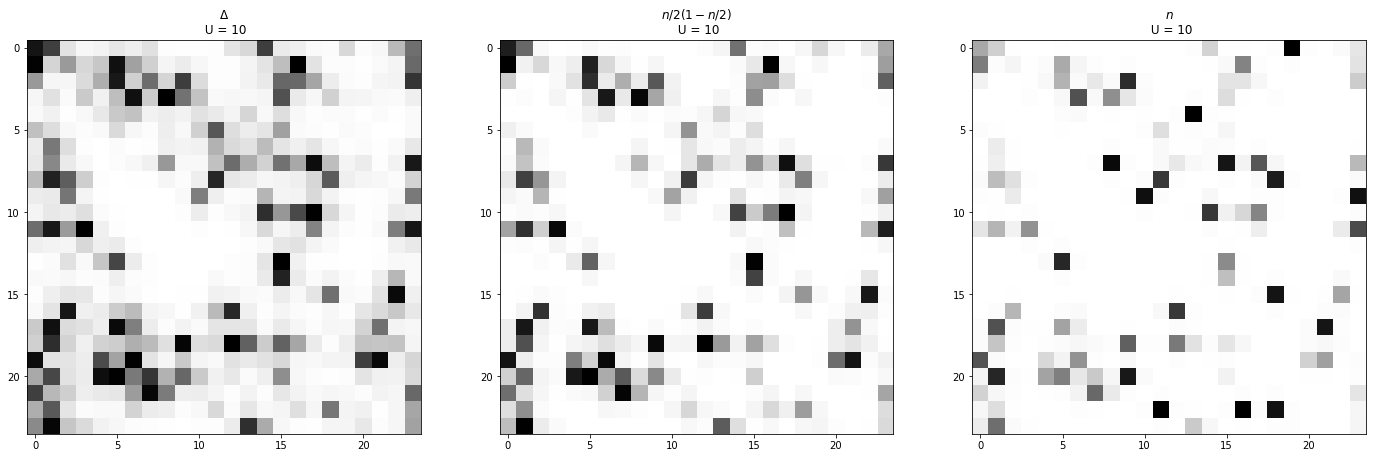

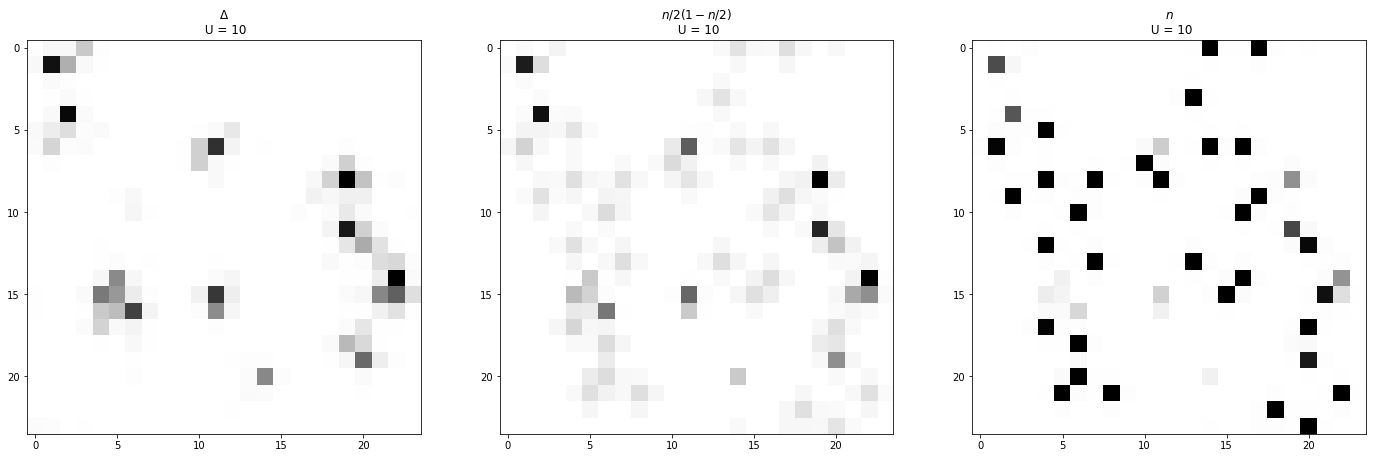

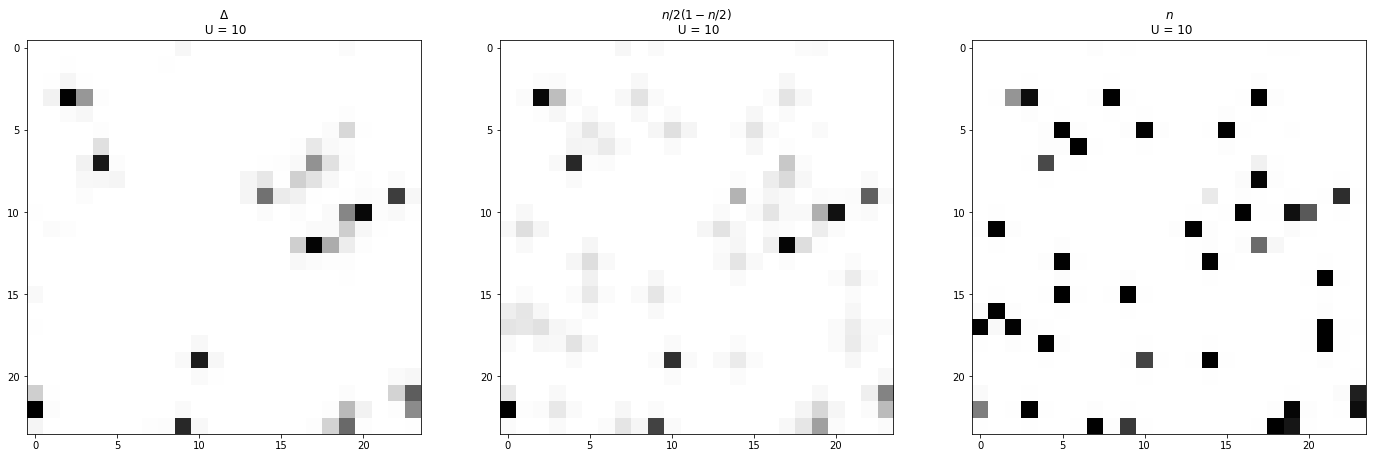

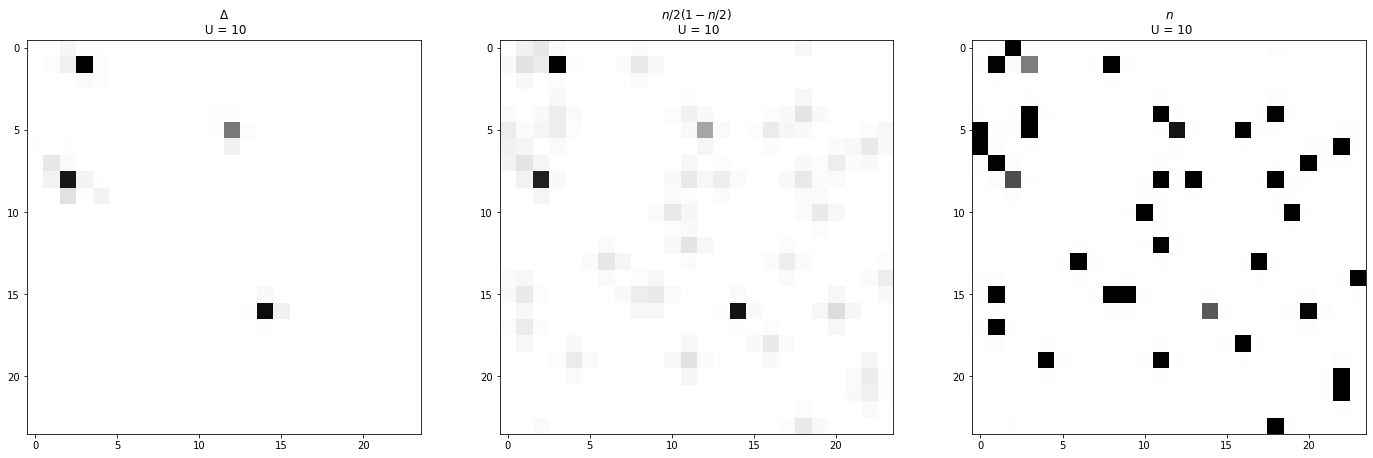

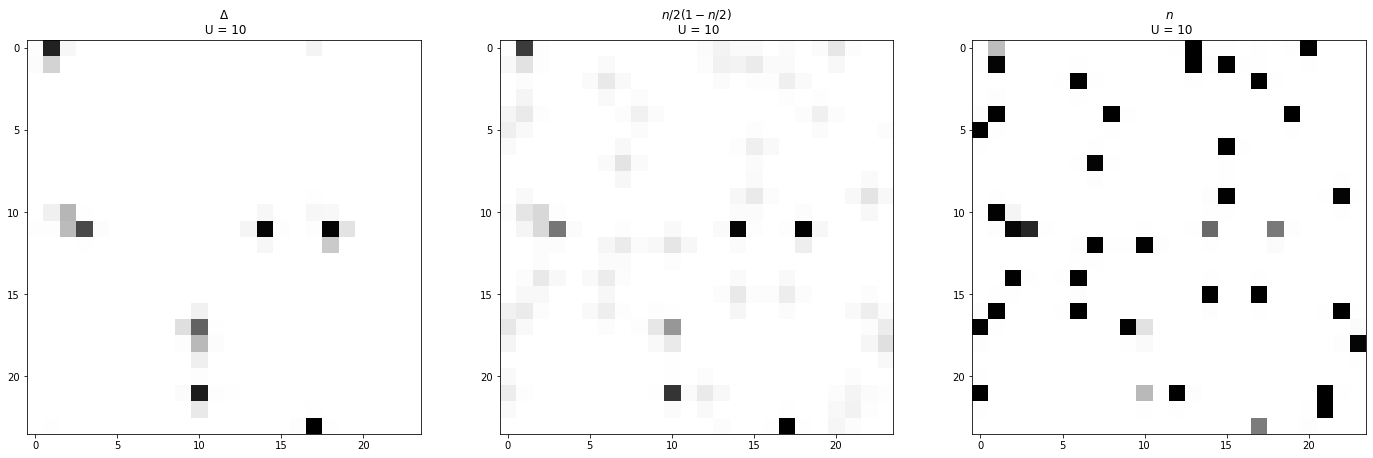

In [20]:
U = 10
for V in range(1,6):
    with h5py.File(f"data_V{V}/U{U}_point0.125") as f:
        e = f['evals'][:]
        v = f['evecs'][:]
        delta = f['delta'][:]
        n = f['avg'][:]
    indx = np.where(e >= 0)[0]
    plt.figure(figsize=(24, 8))
    plt.subplot(1, 3, 1)
    plt.title('$\Delta$' + f'\n U = {U}')
    plt.imshow(np.abs(delta.reshape(24, 24)), cmap='binary')
    #plt.colorbar()
    plt.subplot(1, 3, 2)
    plt.title('$n / 2 (1 - n / 2)$' + f'\n U = {U}')
    plt.imshow(np.abs(n /2 * (1 - n /2)).reshape(24,24), cmap='binary')
    #plt.colorbar()
    plt.subplot(1, 3, 3)
    plt.title('$n$' + f'\n U = {U}')
    plt.imshow(np.abs(n).reshape(24,24), cmap='binary')

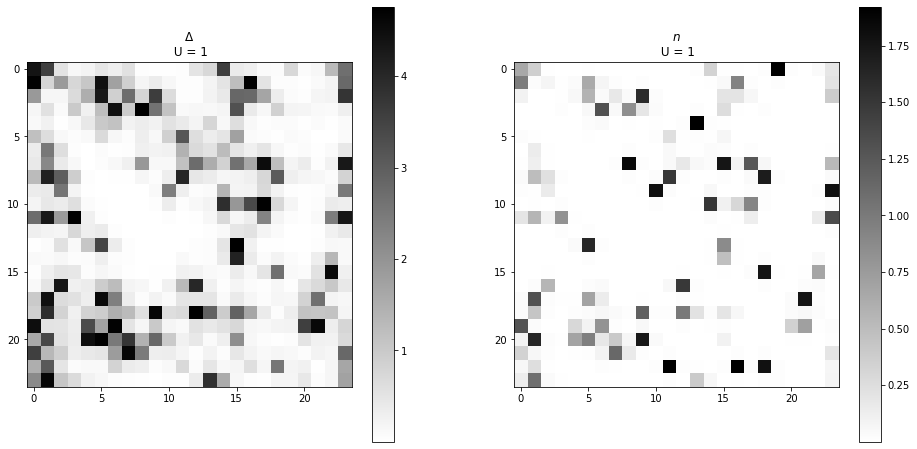

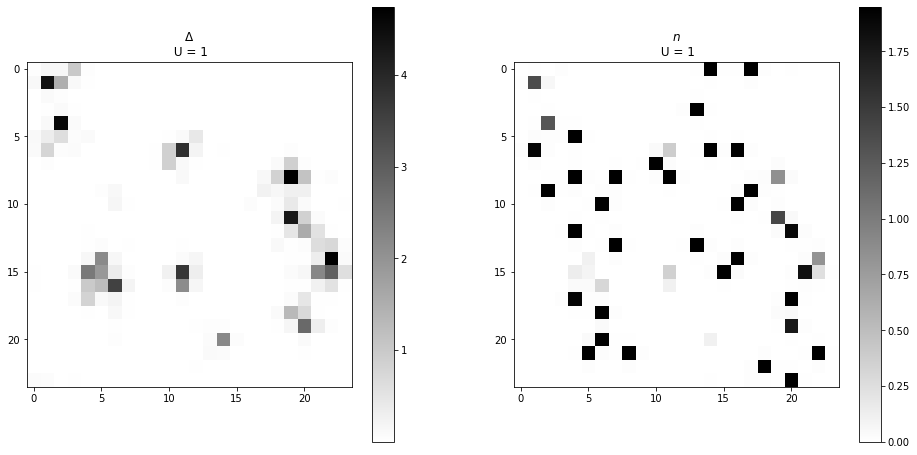

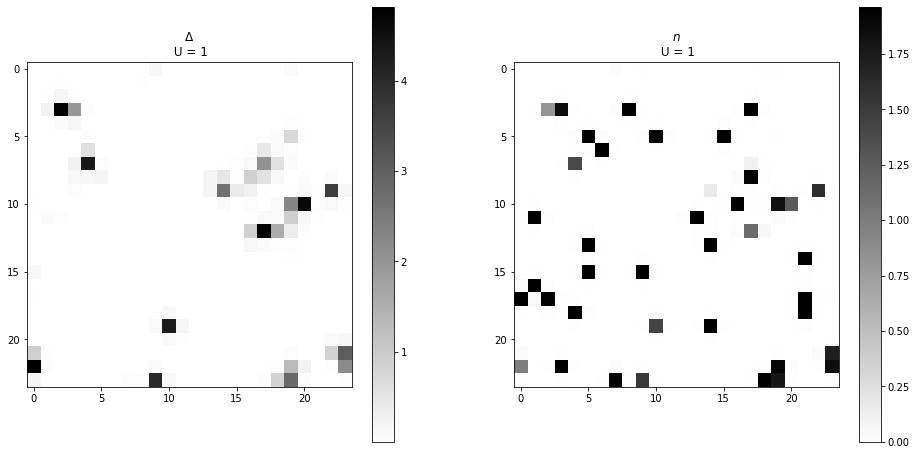

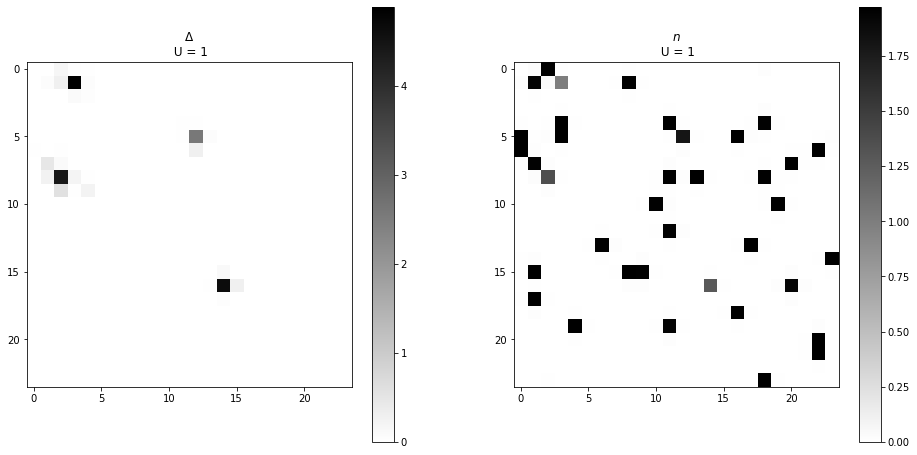

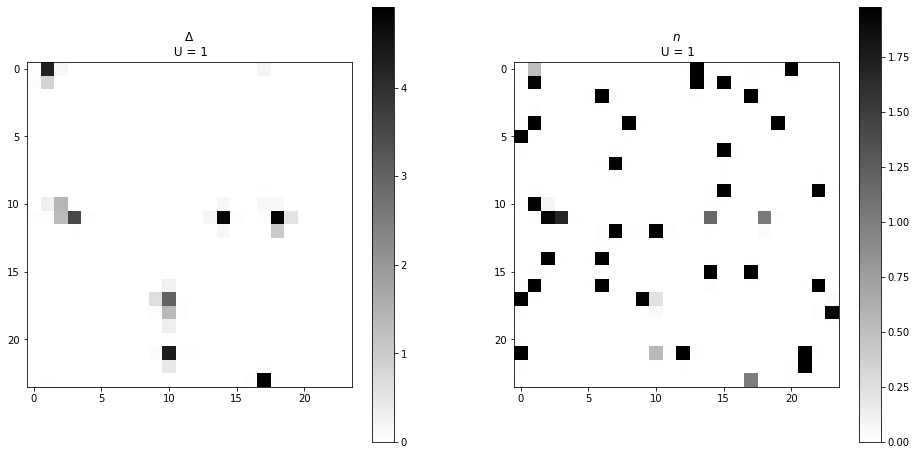

In [6]:
for V in range(1,6):
    with h5py.File(f"data_V{V}/U{10}_point0.125") as f:
        e = f['evals'][:]
        v = f['evecs'][:]
        delta = f['delta'][:]
        n = f['avg'][:]
    indx = np.where(e >= 0)[0]
    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.title('$\Delta$' + f'\n U = {U}')
    plt.imshow(np.abs(delta.reshape(24, 24)), cmap='binary')
    plt.colorbar()
    plt.subplot(1, 2, 2)
    plt.title('$n$' + f'\n U = {U}')
    plt.imshow(np.abs(n).reshape(24,24), cmap='binary')
    plt.colorbar()

In [25]:
import tqdm

In [63]:
def dddd(e,v,U,x,y):
    N = x * y
    indx = np.where(e >= 0.0)[0]
    data = {}
    for i in tqdm.tqdm_notebook(range(N)):
        for j in range(N):
            rij = distance(i, j, x, y)
            I1 = np.sum(v[N + i, indx] * v[N + j, indx], dtype=np.float64)
            I2 = np.sum(v[N + i, indx] * v[i, indx], dtype=np.float64)
            I3 = np.sum(v[j, indx] * v[N + j, indx], dtype=np.float64)
            value = I1**2 + I2*I3
            if rij not in data:
                data[rij] = [value]
            else:
                data[rij].append(value)
    return data

/usr/lib/python3/dist-packages/ipykernel_launcher.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """


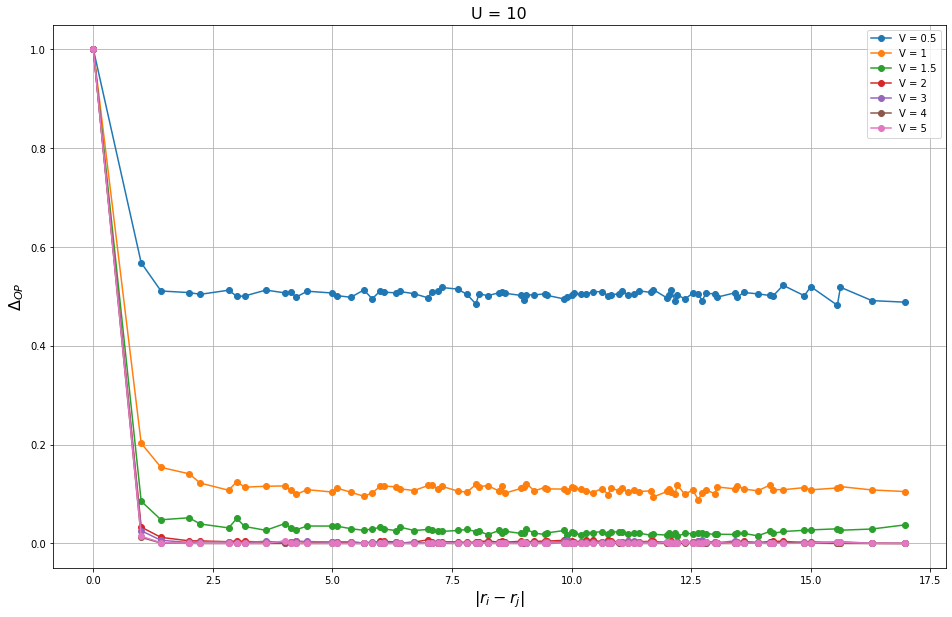

In [66]:
plt.figure(figsize=(16,10))
plt.title('U = 10', fontsize = 16)
Vs = [0.5, 1, 1.5, 2, 3, 4, 5]
U = 10
for V in Vs:
    with h5py.File(f"data_V{V}/U{U}_point0.125") as f:
        delta = f['delta'][:]
        n = f['avg'][:]
        e = f['evals'][:]
        v = f['evecs'][:]
    data = dddd(e, v, U, 24, 24)
    for k in data:
        data[k] = np.mean(data[k])
    rij = sorted(data.keys())
    dij = [ data[ij] for ij in rij]
    plt.ylabel('$\Delta_{OP}$', fontsize = 16)
    plt.xlabel('$|r_{i} - r_{j}|$', fontsize = 16)
    plt.plot(rij,dij / np.max(dij), '-o', label = 'V = ' + str(V))
plt.grid()
plt.legend()

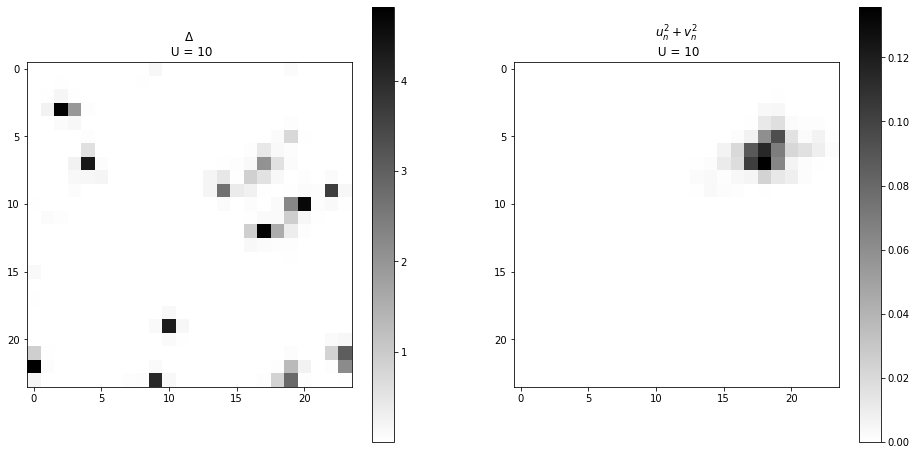

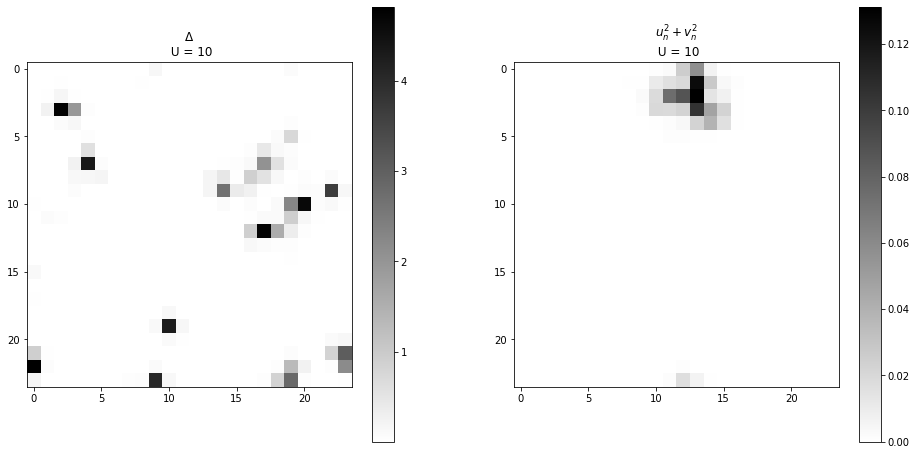

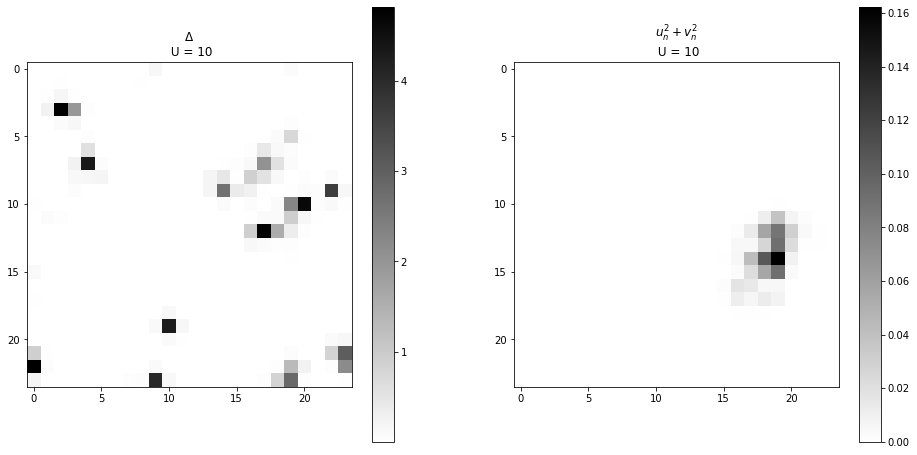

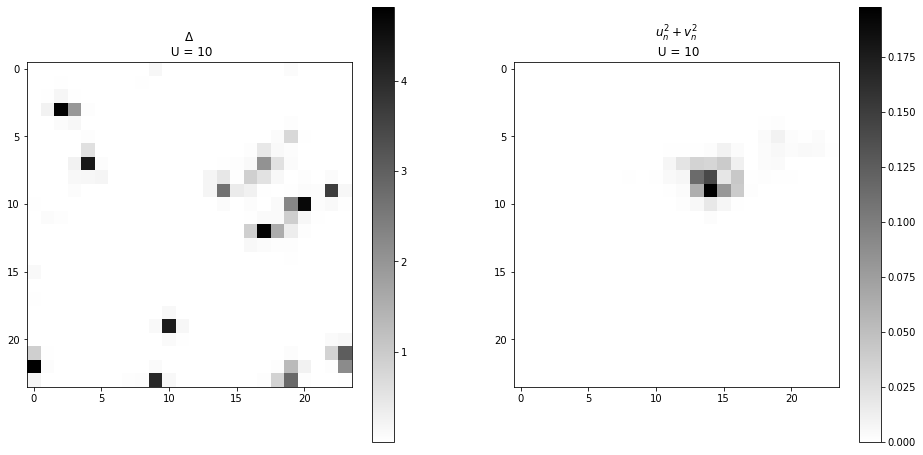

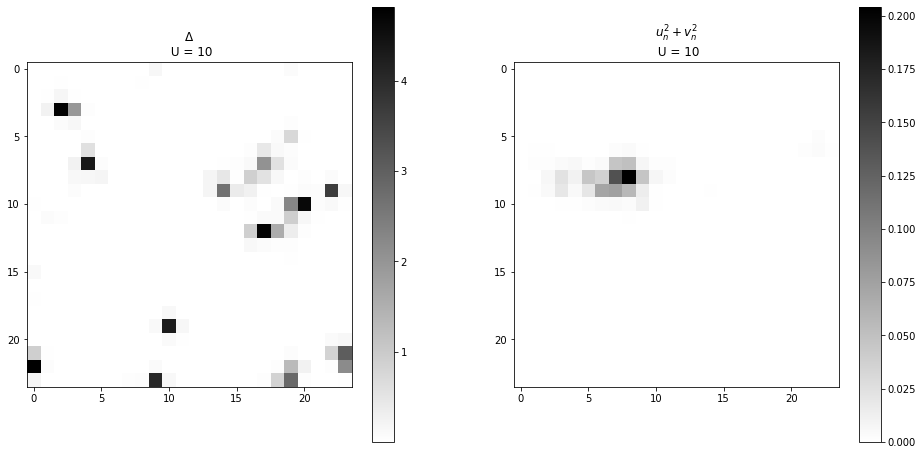

In [32]:
U = 10
N = 576
for i in range(5):
    with h5py.File(f"data_V3/U{U}_point0.125") as f:
        e = f['evals'][:]
        v = f['evecs'][:]
        delta = f['delta'][:]
        n = f['avg'][:]
    indx = np.where(e >= 0)[0]
    corr = v[N:,indx] ** 2 + v[:N,indx]**2
    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.title('$\Delta$' + f'\n U = {U}')
    plt.imshow(np.abs(delta.reshape(24, 24)), cmap='binary')
    plt.colorbar()
    plt.subplot(1, 2, 2)
    plt.title('$u_{n}^{2} + v_{n}^{2}$' + f'\n U = {U}')
    plt.imshow(np.abs(corr[:,i]).reshape(24,24),cmap = 'binary')#,vmin = 0., vmax = 0.035)
    plt.colorbar()

KeyError: "Unable to open object (object 'delta' doesn't exist)"

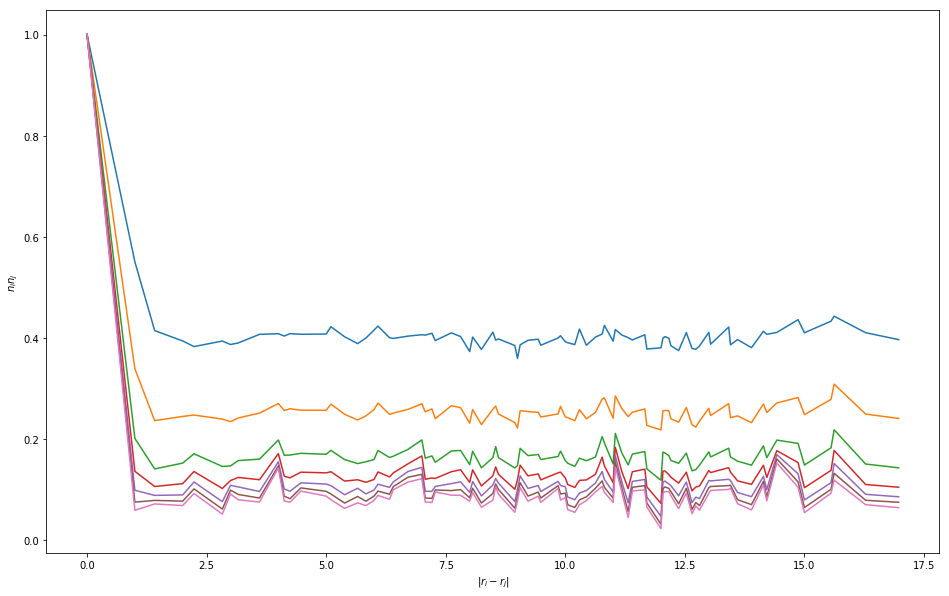

In [526]:
plt.figure(figsize=(16,10))
for U in range(3,11):
    with h5py.File(f"data_V1.5/U{U}_point0.125") as f:
        delta = f['delta'][:]
        n = f['avg'][:]
    data = dd(24 ** 2, 24, 24, n)
    for k in data:
        data[k] = np.mean(data[k])
    rij = sorted(data.keys())
    dij = [ data[ij] for ij in rij]
    plt.ylabel('$n_{i}n_{j}$')
    plt.xlabel('$|r_{i} - r_{j}|$')
    plt.plot(rij,dij / np.max(dij), label = 'U = ' + str(U))
plt.grid()
plt.legend()

In [7]:
def gauss_hist(x, n, sigma):
    f = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        f[i] = np.sum(np.exp( - (x[i]- n) ** 2 / 2 / sigma**2 ) / np.sqrt(2 * np.pi * sigma ** 2)) / n.shape[0] 
    return f

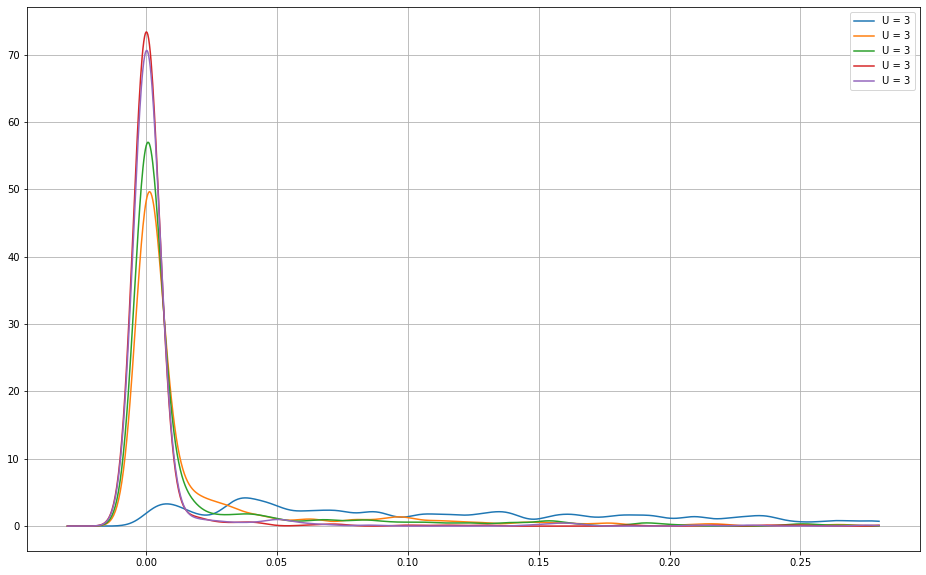

In [9]:
plt.figure(figsize=(16,10))
for V in range(1,6):
    with h5py.File(f"data_V{V}/U{10}_point0.125") as f:
        delta = f['delta'][:]
        n = f['avg'][:]
    delta = np.abs(delta) 
    x = np.linspace(np.min(delta) - 0.03,0.25 + 0.03, 1000)
    plt.plot(x, gauss_hist(x,delta, 0.005), label= 'U = ' + str(U))
plt.grid()
plt.legend()

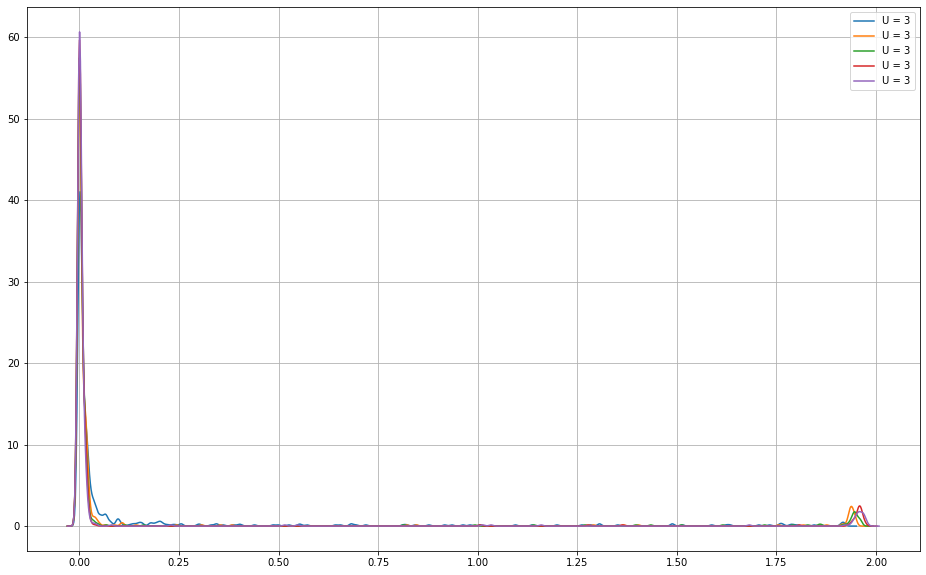

In [10]:
plt.figure(figsize=(16,10))
for V in range(1,6):
    with h5py.File(f"data_V{V}/U{10}_point0.125") as f:
        delta = f['delta'][:]
        n = f['avg'][:]
    x = np.linspace(0.0 - 0.03, np.max(n) + 0.03, 1000)
    plt.plot(x, gauss_hist(x,n, 0.005), label= 'U = ' + str(U))
plt.grid()
plt.legend()

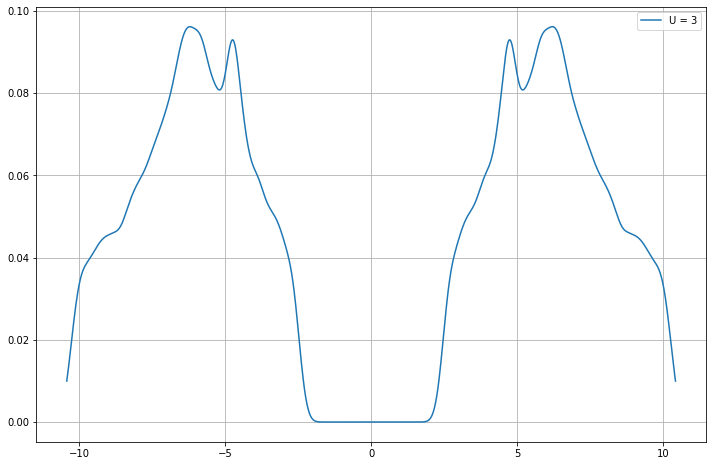

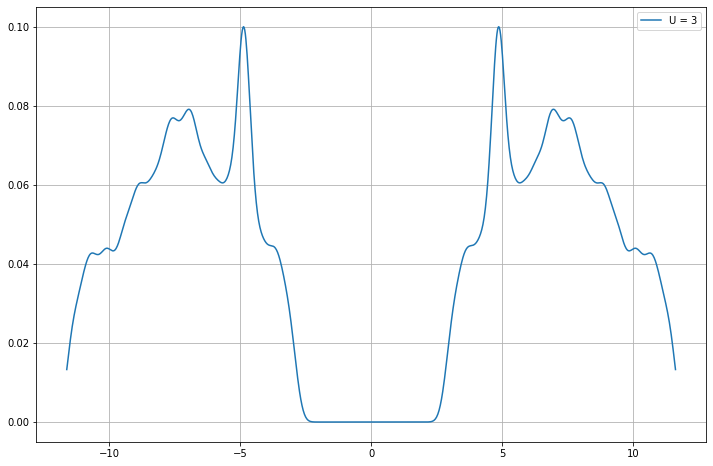

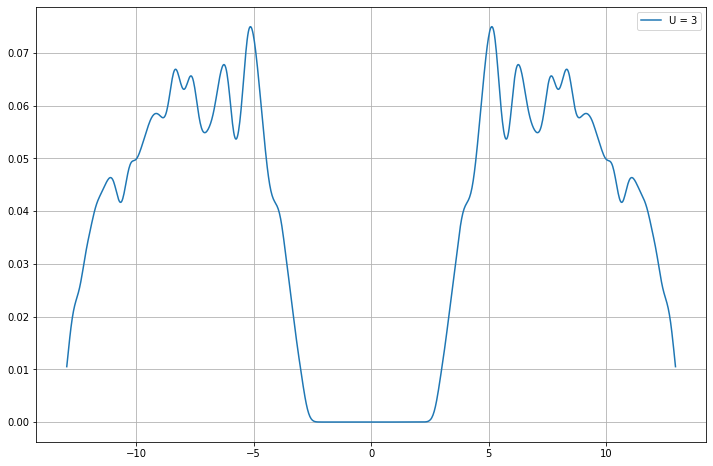

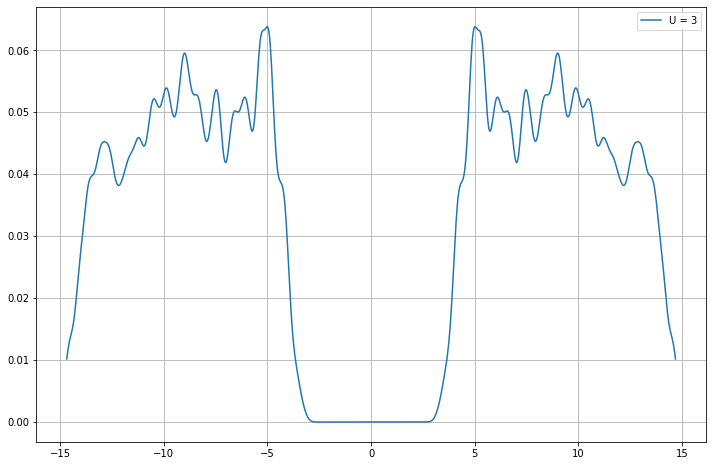

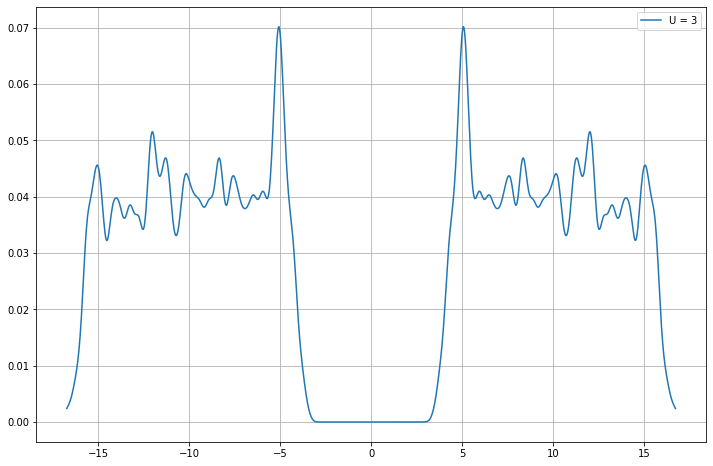

In [11]:
for V in range(1,6):
    with h5py.File(f"data_V{V}/U{10}_point0.125") as f:
        delta = f['delta'][:]
        n = f['avg'][:]
        e = f['evals'][:]
        v = f['evecs'][:]
    indx = np.where(e >= 0)
    plt.figure(figsize=(12,8))
    x = np.linspace(np.min(e), np.max(e), 1000)
    plt.plot(x, gauss_hist(x,e, 0.2), label= 'U = ' + str(U))
    #plt.figure(figsize=(12,8))
    #plt.scatter(range(e.shape[0]), sorted(e), s=10, label= 'U = ' + str(U))
    plt.grid()
    plt.legend()

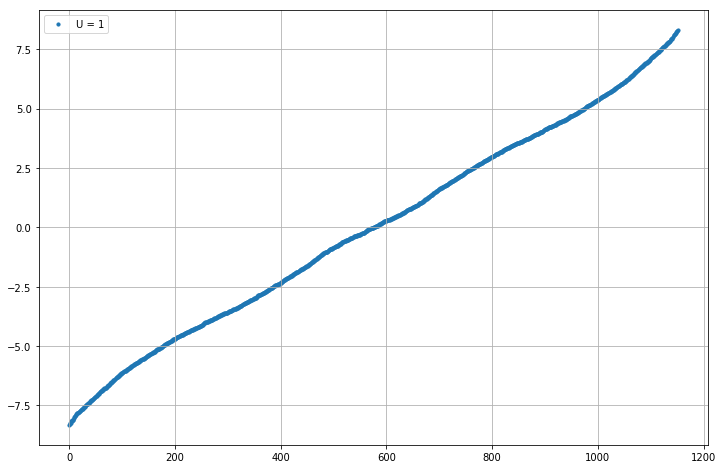

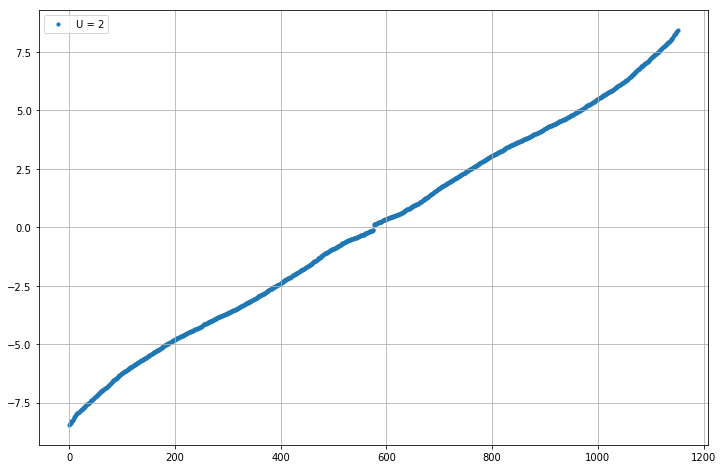

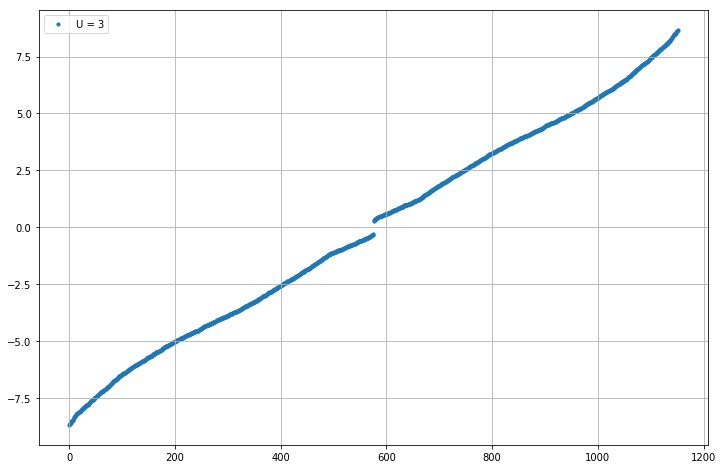

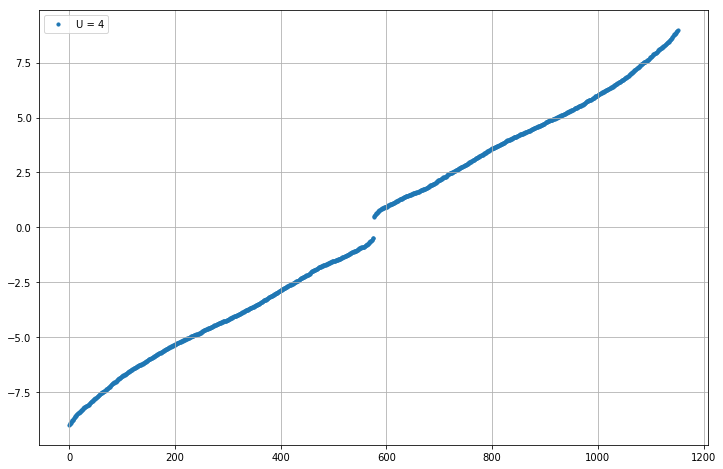

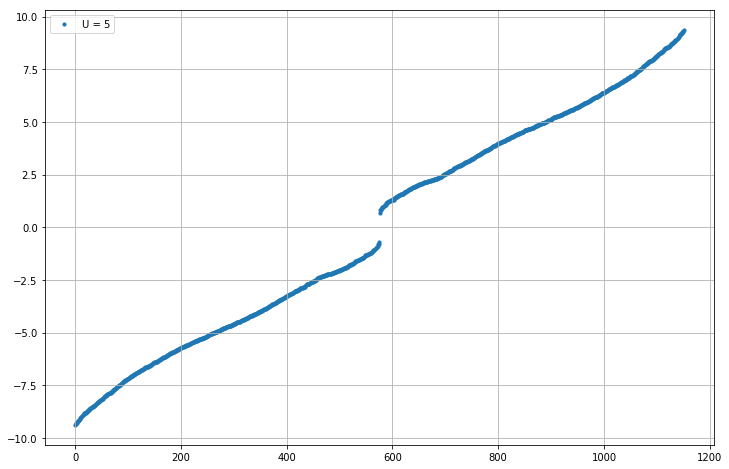

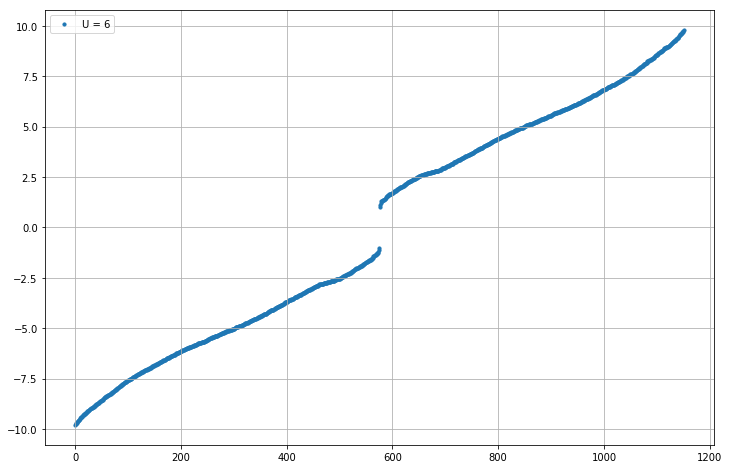

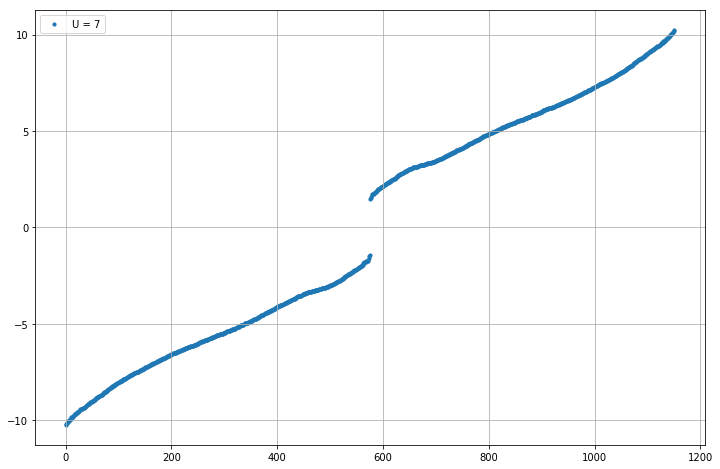

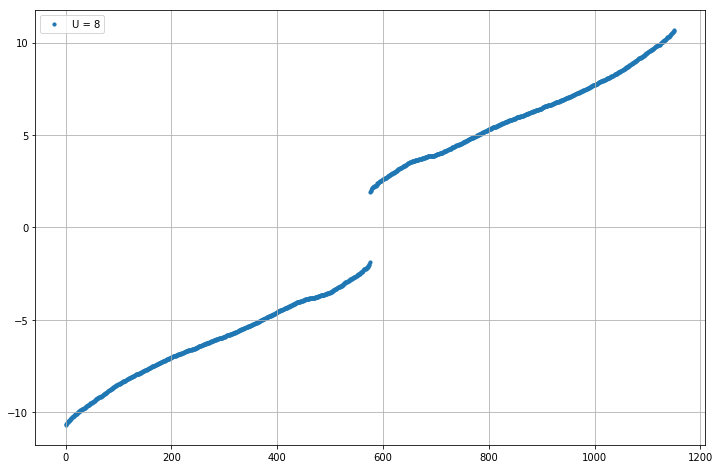

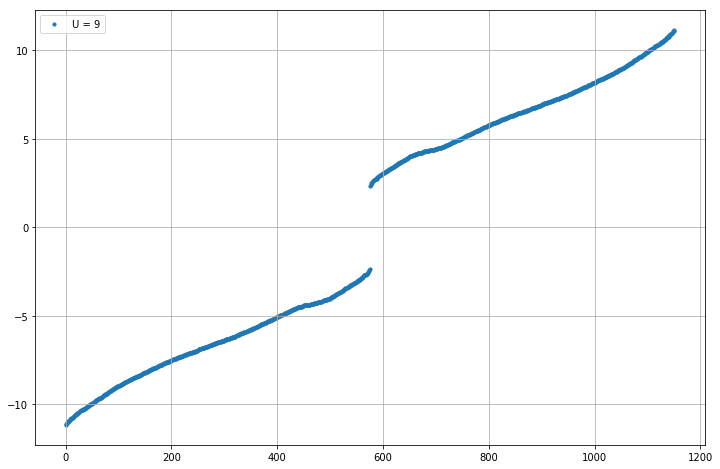

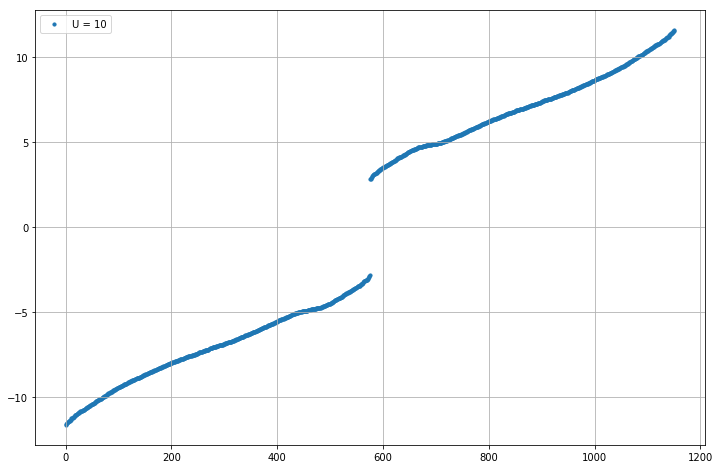

In [476]:
for U in range(1,11):
    with h5py.File(f"data_V2/U{U}_point0.125") as f:
        delta = f['delta'][:]
        n = f['avg'][:]
        e = f['evals'][:]
        v = f['evecs'][:]
    indx = np.where(e >= 0)
    plt.figure(figsize=(12,8))
    #plt.plot(x, gauss_hist(x,e, 0.2), label= 'U = ' + str(U))
    #plt.figure(figsize=(12,8))
    plt.scatter(range(e.shape[0]), sorted(e), s=10, label= 'U = ' + str(U))
    plt.grid()
    plt.legend()

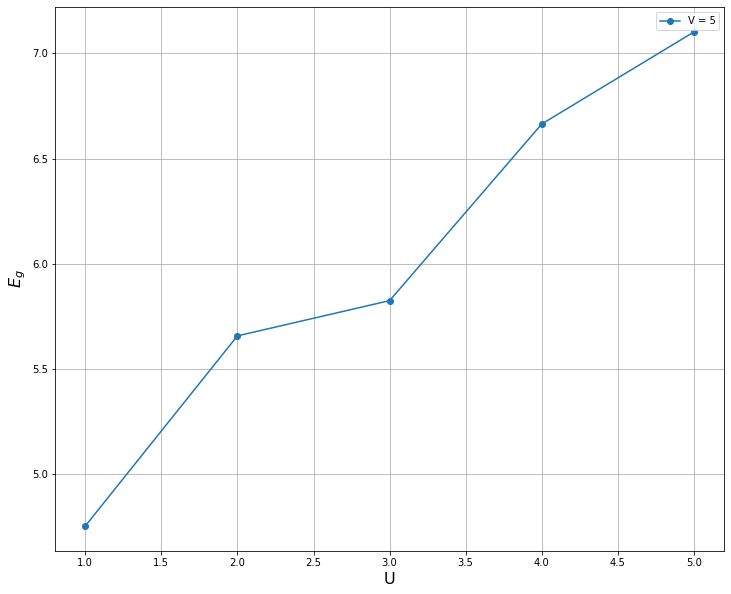

In [19]:
Us = [10]
Vs = [1,2,3,4,5]
plt.figure(figsize=(12,10))
Eg = []
for V in Vs: 
    for U in Us:
        with h5py.File(f"data_V{V}/U{U}_point0.125") as f:
            delta = f['delta'][:]
            n = f['avg'][:]
            e = f['evals'][:]
            v = f['evecs'][:]
            Eg.append(np.min(abs(e) * 2))
    
    #plt.hist(e, 20)
plt.plot(Vs, np.array(Eg), '-o', label = 'V = ' + str(V))
plt.xlabel('U', fontsize = 16)
plt.ylabel('$E_{g}$', fontsize = 16)
#plt.scatter(range(e.shape[0]), sorted(e), label= 'U = ' + str(U))
plt.grid()
plt.legend()